# B(E2) analysis

Collect proton/neutron E2 matrix elements from runs using random samples of USDB

$ B(E2) = b^4 \left[ e_p M_p + e_n M_n \right]^2 $

Want to compute (approx) posterior distributions for oscillator length $b$, and effective charges $e_p$ and $e_n$ .

Prior assumptions:

$P(b) \sim A^{1/6}$

$P(e_p) \sim U[1,2]$

$P(e_n) \sim U[0,1]$


In [1]:
import numpy as np

import os
from glob import glob
from tqdm import tqdm

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

import pandas as pd
import pickle as pkl

from hepstats.modeling import bayesian_blocks

def bayesian_blocks_mod(y):
    if len(np.unique(y))==1:
        return None
    tol = np.std(y)/100
    blocks = bayesian_blocks(y)
    diffs = np.diff(blocks)
    mask = np.ones(len(blocks),dtype=bool)
    for i,d in enumerate(diffs):
        if d<tol:
            print(f'Deleting one bin: width = {d}')
            mask[i] = False
    return blocks[mask,...]

### EXAMPLE
###    blocks = bayesian_blocks_mod(y)
###    plt.hist(y, bins=blocks, density=True)

In [2]:
path_to_input_csv = '/p/lustre2/fox39/shmuq_e2/sd_E2_processed.csv'
path_to_usdb_csv = '/p/lustre2/fox39/shmuq_e2/sd_E2_usdb.csv'
df_input = pd.read_csv(path_to_input_csv)
df_usdb = pd.read_csv(path_to_usdb_csv)

In [3]:
df_input

,Unnamed: 0,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,E_gamma (keV),...,Thalf (sec),Thalf Unc (sec),B_exp (e^2fm^4),B_exp Unc (e^2fm^4),Nucleus,Jf,twoJf,ni,nf,Include
0,0,16,O,8,8,6917.10,0.60,2,4.70 FS 0.13,867.70,...,4.700000e-15,1.300000e-16,64.665806,7.185090,16O,0,0,1,2,False
1,1,16,O,8,8,9844.50,0.50,2,0.62 KEV 0.1,3794.60,...,7.358540e-19,4.562295e-18,2.874036,0.718509,16O,0,0,2,2,False
2,2,16,O,8,8,10356.00,3.00,4,26 KEV 3,3439.00,...,1.754729e-20,1.520765e-19,155.676940,14.370179,16O,2,4,1,1,False
3,3,16,O,8,8,11096.70,1.60,4,0.28 KEV 0.05,4179.00,...,1.629391e-18,9.124589e-18,2.395030,0.718509,16O,2,4,2,1,False
4,4,17,O,8,9,870.73,0.10,1/2,179.2 PS 1.8,870.71,...,1.792000e-10,1.800000e-12,6.206033,0.077900,17O,5/2,5,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,310,40,Ca,20,20,7561.17,0.07,4,0.17 PS 0.04,2312.10,...,1.700000e-13,4.000000e-14,31.692917,13.814861,40Ca,2,4,4,2,False
311,311,40,Ca,20,20,7676.60,0.50,6,0.20 PS 0.05,2399.20,...,2.000000e-13,5.000000e-14,35.756112,12.189584,40Ca,4,8,2,1,False
312,312,40,Ca,20,20,7976.55,0.03,2,21 FS 21,4624.00,...,2.100000e-14,2.100000e-14,1.950333,0.000000,40Ca,0,0,9,2,False
313,313,40,Ca,20,20,7976.55,0.03,2,21 FS 21,2699.00,...,2.100000e-14,2.100000e-14,9.751667,0.000000,40Ca,4,8,9,1,False


In [4]:
df_usdb

,Unnamed: 0,Unnamed: 0.1,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,...,B_exp (e^2fm^4),B_exp Unc (e^2fm^4),Nucleus,Jf,twoJf,ni,nf,Include,Mth_p,Mth_n
0,4,4,17,O,8,9,870.73,0.10,1/2,179.2 PS 1.8,...,6.206033,0.077900,17O,5/2,5,1,1,True,0.0000,-1.5451
1,5,5,18,O,8,10,1982.07,0.09,2,1.94 PS 0.05,...,9.303629,0.252207,18O,0,0,1,1,True,0.0000,-1.3090
2,6,6,18,O,8,10,3554.84,0.40,4,17.2 PS 0.8,...,3.334734,0.168138,18O,2,4,1,1,True,0.0000,-1.1707
3,7,7,18,O,8,10,3633.76,0.11,0,0.96 PS 0.11,...,47.639064,5.604596,18O,2,4,2,1,True,0.0000,0.4431
4,8,8,18,O,8,10,3920.44,0.14,2,18.4 FS 2,...,3.642987,0.560460,18O,0,0,2,1,True,0.0000,0.2496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,282,282,38,Ar,18,20,6053.20,0.40,4,71 FS 14,...,41.740576,20.490828,38Ar,2,4,2,2,True,0.0232,0.0000
232,283,283,38,Ar,18,20,6053.20,0.40,4,71 FS 14,...,189.729892,98.659544,38Ar,2,4,2,3,True,-0.4832,0.0000
233,292,292,38,K,19,19,458.53,0.16,1,7.0 PS 0.6,...,39.463817,11.383793,38K,3,6,1,1,True,0.8752,0.8752
234,293,293,38,K,19,19,1697.65,0.25,1,48 FS 10,...,0.683028,0.607136,38K,3,6,2,1,True,-0.1153,-0.1153


In [5]:
df_input = df_input[df_input['Include']==True]
df_usdb = df_usdb[df_usdb['Include']==True]

In [6]:
usdbmil = np.loadtxt('/p/lustre2/fox39/shmuq_e2/usdbmil.vec',skiprows=1)
usdb = np.loadtxt('/p/lustre2/fox39/shmuq_e2/usdb.vec',skiprows=1)

In [7]:
n_transitions = len(df_input)
print('# transitions =', n_transitions)

# transitions = 236


In [8]:
df_usdb.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'A', 'Element', 'Z', 'N', 'Energy (keV)',
       'Energy Unc (keV)', 'Ji', 'Thalf', 'E_gamma (keV)', 'E_gamma Unc (keV)',
       'I_gamma', 'I_gamma Unc', 'Mult', 'Mult Ratio', 'Mult Ratio Unc',
       'Conv Coef', 'Conv Coef Unc', 'B_exp (W.u.)', 'B_exp Unc (W.u.)',
       'twoJi', 'Thalf Value', 'Thalf Units', 'Thalf Unc', 'Thalf (sec)',
       'Thalf Unc (sec)', 'B_exp (e^2fm^4)', 'B_exp Unc (e^2fm^4)', 'Nucleus',
       'Jf', 'twoJf', 'ni', 'nf', 'Include', 'Mth_p', 'Mth_n'],
      dtype='object')

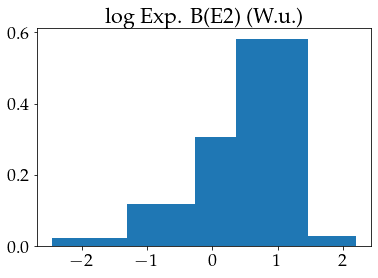

In [9]:
y = np.log10(df_usdb['B_exp (W.u.)'])
blocks = bayesian_blocks_mod(y)
plt.hist(y, bins=blocks, density=True)
plt.title('log Exp. B(E2) (W.u.)')
plt.show()

In [10]:
print(f'Out of {len(y)} transitions, {len(y[y<0])} are smaller than the Weisskopf estimate')

Out of 236 transitions, 53 are smaller than the Weisskopf estimate


In [11]:
data_path = '/p/lustre2/fox39/shmuq_e2/results'
run_dir_list = []
# for batch_dir in sorted(glob(os.path.join(data_path,'batch_job*'))):
# #     print(batch_dir)
#     for run_dir in sorted(glob(os.path.join(batch_dir,'run_usdb_rand?????'))):
#         run_dir_list.append(run_dir)
#         print(run_dir)

for run_dir in sorted(glob(os.path.join(data_path,'run_usdb_rand?????'))):
    run_dir_list.append(run_dir)
    print(run_dir)


/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00001
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00002
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00003
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00004
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00005
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00006
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00007
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00008
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00009
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00010
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00011
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00012
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00013
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00014
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00015
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00016
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00017
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand00018
/p/lustre2/fox39/shmuq_e2/results/run_usdb_ran

/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01969
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01970
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01971
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01972
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01973
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01974
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01975
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01976
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01977
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01978
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01979
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01980
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01981
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01982
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01983
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01984
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01985
/p/lustre2/fox39/shmuq_e2/results/run_usdb_rand01986
/p/lustre2/fox39/shmuq_e2/results/run_usdb_ran

In [12]:
collect_data = False

n_params = 66
n_samples = len(run_dir_list)
fn_data = f'transition_data_n{n_samples}.pkl'

if collect_data:
    df_dict = {}
    int_vec_array = []
    mil_vec_array = []
    for run_dir in run_dir_list_trunc:
        print(run_dir)
        run_num_string = run_dir.split('rand')[-1]
        run_num = int(run_num_string)-1
        df_dict[run_num_string] = pd.read_csv(os.path.join(run_dir,f'sd_E2_usdb_rand{run_num_string}_complete.csv'))
        int_vec_array.append(np.loadtxt(os.path.join(run_dir,f'usdb_rand{run_num_string}.vec'),skiprows=1))
        mil_vec_array.append(np.loadtxt(os.path.join(run_dir,f'usdbmil_rand{run_num_string}.vec'),skiprows=1))

    int_vec_array = np.array(int_vec_array)
    mil_vec_array = np.array(mil_vec_array)
    
    with open(fn_data,'wb') as fh:
        pkl.dump([df_dict,int_vec_array,mil_vec_array],fh)
else:
    with open(fn_data,'rb') as fh:
        [df_dict,int_vec_array,mil_vec_array] = pkl.load(fh)

### PCA-parameter sample distributions
Note that below each is 1/variance = Hessian eigenvalue.

In [13]:
def bayesian_blocks_mod(y):
    tol = np.std(y)/100
    blocks = bayesian_blocks(y)
    diffs = np.diff(blocks)
    mask = np.ones(len(blocks),dtype=bool)
    for i,d in enumerate(diffs):
        if d<tol:
            print(f'Deleting one bin: width = {d}')
            mask[i] = False
    return blocks[mask,...]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


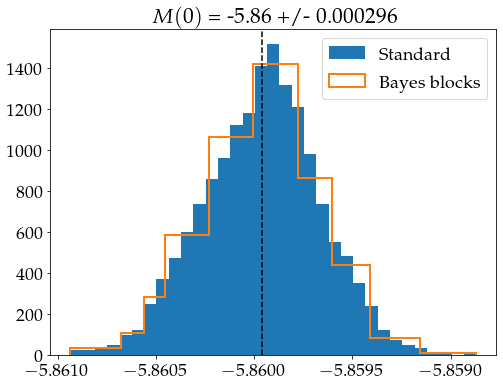

1/variance =  11440473.260440737
[-5.86093472 -5.86067701 -5.86056251 -5.86045181 -5.86022999 -5.86000385
 -5.85977676 -5.85960366 -5.85941117 -5.85915393 -5.85886978]


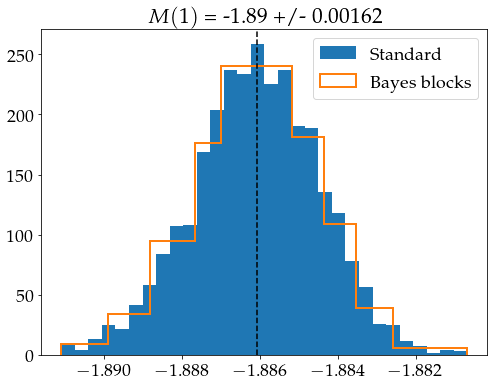

1/variance =  382724.90733335057
[-1.89110695 -1.88991986 -1.88882722 -1.88766528 -1.88701309 -1.88517512
 -1.88437394 -1.88354355 -1.88258626 -1.88068623]


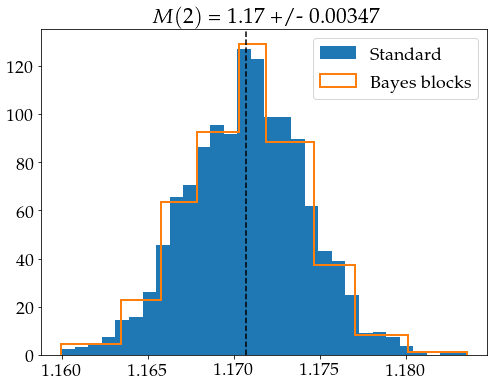

1/variance =  83076.78686353331
[1.15993708 1.16340727 1.16572873 1.16786406 1.17027423 1.1718481
 1.17468106 1.17705853 1.18013529 1.18357678]


In [14]:
# for mi in range(n_params):
for mi in range(3):
    y = mil_vec_array[:,mi]
#     print(y)
    blocks = bayesian_blocks_mod(y)
    plt.figure(figsize=(8,6))
    plt.hist(y,bins=optimal_n_bins(y),density=True,label='Standard')
#     plt.hist(y,bins=10,density=True,label='Standard')
    plt.hist(y, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
    plt.title(fr'$M({mi})$ = {np.mean(y):5.3} +/- {np.std(y):5.3}')
    plt.axvline(usdbmil[mi],c='k',ls='--')
    plt.legend()
    plt.show()
    print('1/variance = ',(1/np.std(y))**2)
    print(blocks)

### USDB parameter sample distributions

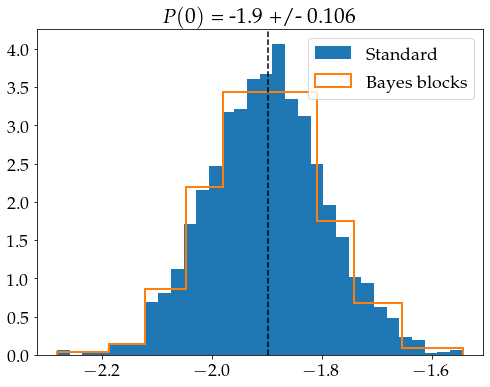

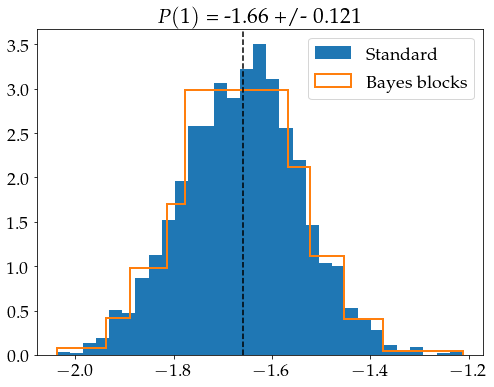

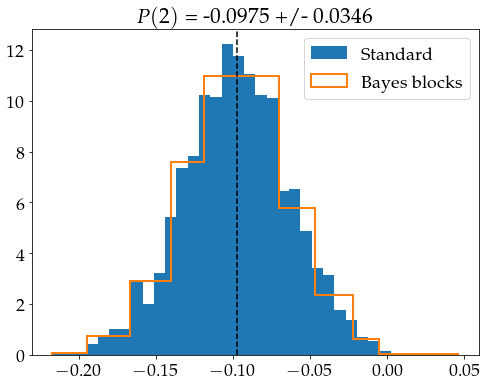

In [15]:
# for pi in range(n_params):
for pi in range(3):
    y = int_vec_array[:,pi]
    blocks = bayesian_blocks_mod(y)
    plt.figure(figsize=(8,6))
    plt.hist(y,bins=optimal_n_bins(y),density=True,label='Standard')
#     plt.hist(y,bins=10,density=True,label='Standard')
    plt.hist(y, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
    plt.title(fr'$P({pi})$ = {np.mean(y):5.3} +/- {np.std(y):5.3}')
    plt.axvline(usdb[pi],c='k',ls='--')
    plt.legend()
    plt.show()

### Shell-model B(E2) distributions 

In [16]:
def matrix_element_distributions(ti,plot=False):
    nuc = df_usdb.iloc[ti]['Nucleus']
    A = df_usdb.iloc[ti]['A']
    Z = df_usdb.iloc[ti]['Z']
    N = df_usdb.iloc[ti]['N']
    ji = df_usdb.iloc[ti]['Ji']
    ni = df_usdb.iloc[ti]['ni']
    jf = df_usdb.iloc[ti]['Jf']
    nf = df_usdb.iloc[ti]['nf']
#     print(df_dict['00001'].iloc[ti])
    Mth_p_vec = np.array([df_dict[run_num_string].iloc[ti]['Mth_p'] for run_num_string in list(df_dict.keys()) ])
    Mth_n_vec = np.array([df_dict[run_num_string].iloc[ti]['Mth_n'] for run_num_string in list(df_dict.keys()) ])

    Mth_p_usdb = df_usdb.iloc[ti]['Mth_p']
    Mth_n_usdb = df_usdb.iloc[ti]['Mth_n']

    no_proton = False
    no_neutron = False
    if np.array_equal(Mth_p_vec,np.zeros_like(Mth_p_vec)):
        print('Proton parts are all zero')
        Mth_n_vec = np.abs(Mth_n_vec)
        Mth_n_usdb = np.abs(Mth_n_usdb)
        no_proton = True
    elif np.array_equal(Mth_n_vec,np.zeros_like(Mth_n_vec)):
        print('Neutron parts are all zero')
        Mth_p_vec = np.abs(Mth_p_vec)
        Mth_p_usdb = np.abs(Mth_p_usdb)
        no_neutron = True
    else:
        rel_sign = np.sign(Mth_p_vec)*np.sign(Mth_n_vec)
        Mth_p_vec = np.abs(Mth_p_vec)  #Mth_p >0 always
        Mth_n_vec = np.abs(Mth_n_vec)*rel_sign
        rel_sign_usdb = np.sign(Mth_p_usdb)*np.sign(Mth_n_usdb)
        Mth_p_usdb = np.abs(Mth_p_usdb)  #Mth_p >0 always
        Mth_n_usdb = np.abs(Mth_n_usdb)*rel_sign_usdb
    
    print('USDB:')
    print(f'Mp = {Mth_p_usdb}')
    print(f'Mn = {Mth_n_usdb}')
#     print(Mth_p_vec[:10])
#     print(Mth_n_vec[:10])
    
    leave_out_outliers = True
    if leave_out_outliers:
        outlier_factor = 5
        count = 0
        p_mean = np.mean(Mth_p_vec)
        n_mean = np.mean(Mth_n_vec)
        p_window = outlier_factor*np.std(Mth_p_vec)
        n_window = outlier_factor*np.std(Mth_n_vec)
        for si in range(n_samples):
            p_out = np.abs(Mth_p_vec[si] - p_mean) > p_window
            n_out = np.abs(Mth_n_vec[si] - n_mean) > n_window
            if p_out or n_out:
                np.delete(Mth_p_vec,[si],0)
                np.delete(Mth_n_vec,[si],0)
                count+=1
        print(f'Dropped {count} outliers.')
    
    if no_neutron and no_proton:
        print('THERE IS NO TRANSITION')
        return None
        
    print('Standard Deviations:')
    print(f'    Proton = {np.std(Mth_p_vec)}')
    print(f'    Neutron = {np.std(Mth_n_vec)}')
    
    color_p = 'orange'
    color_n = 'cyan'
    color_p_usdb = 'red'
    color_n_usdb = 'blue'
    p_ls = '--'
    n_ls = '-.'
    
    std_threshold = 1e-10
    title_string = fr'\#{ti}: {nuc} {ji}({ni}) $\rightarrow$ {jf}({nf})'
    
    if plot:
        plt.figure(figsize=(8,6))
        if no_neutron:
            #only plot proton part
            if (np.std(Mth_p_vec)<std_threshold):
                print('Proton part constant.')
            plt.hist(Mth_p_vec, density=True,color=color_p)
            plt.axvline(Mth_p_usdb,ls=p_ls,color=color_p_usdb,label='USDB')
            plt.xlabel('Mth (Proton only)')
        elif no_proton:
            if (np.std(Mth_n_vec)<std_threshold):
                print('Neutron part constant.')
            plt.hist(Mth_n_vec, density=True,color=color_n)
            plt.axvline(Mth_n_usdb,ls=n_ls,color=color_n_usdb,label='USDB')
            plt.xlabel('Mth (Neutron only)')
        else:    
            blocks_p = bayesian_blocks_mod(Mth_p_vec)
            blocks_n = bayesian_blocks_mod(Mth_n_vec)
            plt.hist(Mth_p_vec, bins=blocks_p, density=True, alpha = 0.5, label='Proton',color=color_p)
            plt.hist(Mth_n_vec, bins=blocks_n, density=True, alpha = 0.5, label='Neutron',color=color_n)
            plt.axvline(Mth_p_usdb,ls=p_ls,color=color_p_usdb,label='USDB Proton')
            plt.axvline(Mth_n_usdb,ls=n_ls,color=color_n_usdb,label='USDB Neutron')
            plt.xlabel('Mth')
        plt.title(title_string)
        plt.ylabel('Density (no units)')
        plt.legend(loc=(1.02,0.2))
        plt.show()

    nuc_dict = {'Nucleus':nuc,
                'A':A,
                'Z':Z,
                'N':N,
                'Ji':ji,
                'Jf':jf,
                'ni':ni,
                'nf':nf,
               }
    return nuc_dict, Mth_p_usdb, Mth_n_usdb, Mth_p_vec, Mth_n_vec, title_string

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 1.5451
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 4.440892098500626e-16
Neutron part constant.


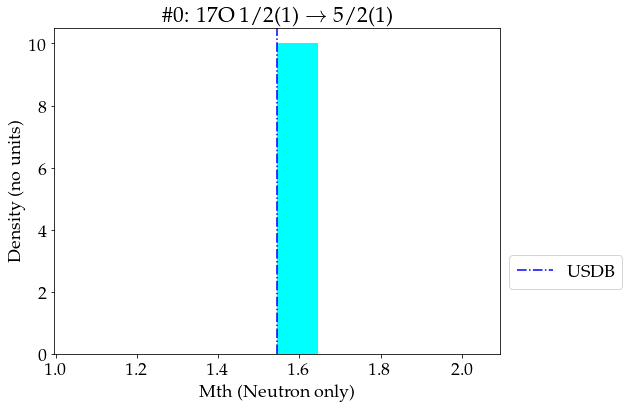

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 1.309
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.007510434431532125


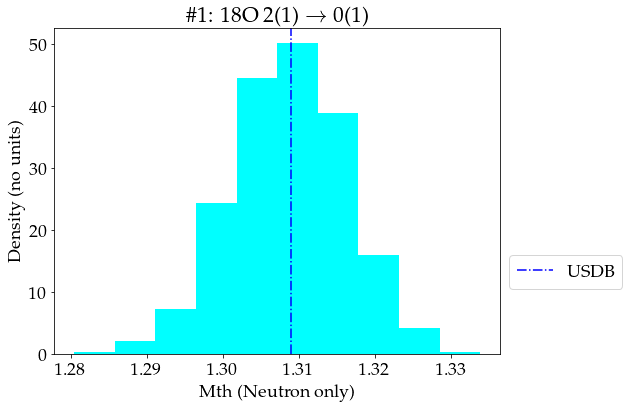

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 1.1707
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.006953838735301217


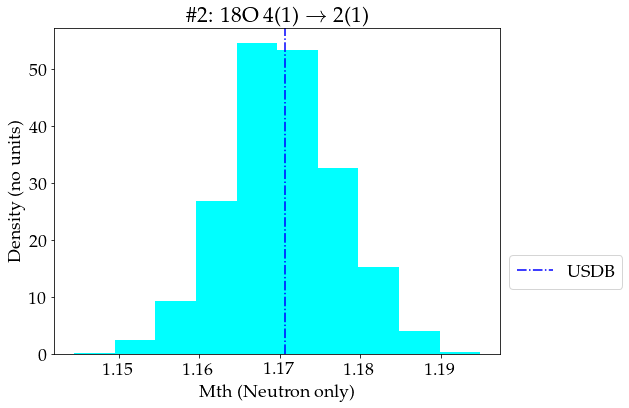

In [17]:
# for ti in range(n_transitions):
for ti in range(3):
    matrix_element_distributions(ti,plot=True)


Proton parts are all zero
USDB:
Mp = 0.0
Mn = 1.5451
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 4.440892098500626e-16


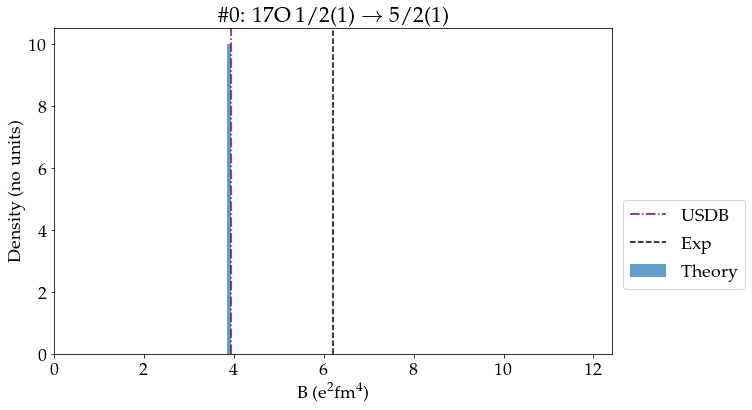

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 1.309
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.007510434431532125


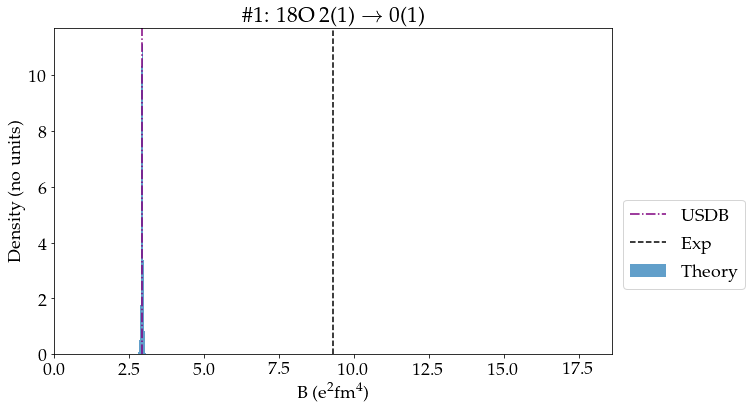

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 1.1707
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.006953838735301217


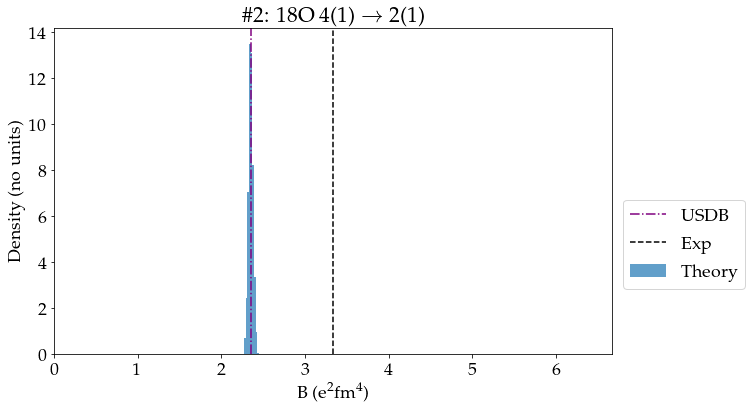

In [18]:
# for ti in range(n_transitions):
for ti in range(3):
    nuc_dict, Mth_p_usdb, Mth_n_usdb, Mth_p_vec, Mth_n_vec, title_string = matrix_element_distributions(ti)
    b = nuc_dict['A']**(1/6)
    e_p = 1.5
    e_n = 0.5
    Bexp_e2fm4 = df_usdb.iloc[ti]['B_exp (e^2fm^4)']
    Bth_e2fm4 = b**4 * ( e_p * Mth_p_vec + e_n * Mth_n_vec)**2
    Bth_usdb_e2fm4 = b**4 * ( e_p * Mth_p_usdb + e_n * Mth_n_usdb)**2
    
    plt.figure(figsize=(10,6))
    plt.hist(Bth_e2fm4,bins=10,density=True,label='Theory',alpha=0.7)
    plt.axvline(Bth_usdb_e2fm4,ls='-.',c='purple',label='USDB')
    plt.axvline(Bexp_e2fm4,ls='--',c='k',label='Exp')
    plt.xlabel(r'B (e$^2$fm$^4$)')
    plt.title(title_string)
    plt.ylabel('Density (no units)')
    plt.legend(loc=(1.02,0.2))
    plt.xlim([0,2*max(Bexp_e2fm4,Bth_usdb_e2fm4)])
    plt.show()

In [21]:
nuc_dict_list = []
Mth_p_usdb_list = []
Mth_n_usdb_list = []
Mth_p_vec_list = []
Mth_n_vec_list = []
title_string_list = []
Bexp_e2fm4_list = []
Bexp_unc_e2fm4_list = []
# for ti in range(n_transitions):
for ti in tqdm(range(n_transitions)):
    nuc_dict, Mth_p_usdb, Mth_n_usdb, Mth_p_vec, Mth_n_vec, title_string = matrix_element_distributions(ti)
    nuc_dict_list.append(nuc_dict)
    Mth_p_usdb_list.append(Mth_p_usdb)
    Mth_n_usdb_list.append(Mth_n_usdb)
    Mth_p_vec_list.append(Mth_p_vec)
    Mth_n_vec_list.append(Mth_n_vec)
    title_string_list.append(title_string)
    Bexp_e2fm4_list.append(df_usdb.iloc[ti]['B_exp (e^2fm^4)'])
    Bexp_unc_e2fm4_list.append(df_usdb.iloc[ti]['B_exp Unc (e^2fm^4)'])

  0%|          | 1/236 [00:00<03:21,  1.16it/s]

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 1.5451
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 4.440892098500626e-16


  1%|          | 2/236 [00:01<03:16,  1.19it/s]

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 1.309
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.007510434431532125


  1%|▏         | 3/236 [00:02<03:10,  1.23it/s]

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 1.1707
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.006953838735301217


  2%|▏         | 4/236 [00:03<03:16,  1.18it/s]

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 0.4431
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.04518105068187005


  2%|▏         | 5/236 [00:04<03:10,  1.21it/s]

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 0.2496
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.02050516364197249


  3%|▎         | 6/236 [00:04<03:07,  1.23it/s]

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 0.5263
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.017206429435738496


  3%|▎         | 7/236 [00:05<03:06,  1.23it/s]

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 0.0331
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.04000183532117785


  3%|▎         | 8/236 [00:06<03:01,  1.25it/s]

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 0.1581
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.02659922948106062


  4%|▍         | 9/236 [00:07<03:21,  1.13it/s]

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 0.0877
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.045582539911673874


  4%|▍         | 10/236 [00:08<03:13,  1.17it/s]

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 1.0409
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.028094946087880854


  5%|▍         | 11/236 [00:09<03:16,  1.15it/s]

Proton parts are all zero
USDB:
Mp = 0.0
Mn = 1.4328
Dropped 0 outliers.
Standard Deviations:
    Proton = 0.0
    Neutron = 0.013240594447122936


  5%|▍         | 11/236 [00:09<03:19,  1.13it/s]


KeyboardInterrupt: 

In [20]:
def chi_squared(theta):
    s,e_p,e_n = theta
    b = A**s
    Bth_vec = b**4 * ( e_p * np.array(Mth_p_vec) + e_n * Mth_n_vec)**2
    R = Bth_vec - np.array(Bexp_e2fm)
    
    
def log_likelihood(theta, x, y, dy):
    y_model = model(theta,x)
    X2 = chi_squared(theta,x,y,dy)
    return   len(x)*( - 0.5 * X2 - np.log(np.sqrt(2*np.pi)) ) + np.sum(np.log(dy))

def log_prior(theta,dtheta,mu=None):
    if mu.all() == None:
        mu = np.zeros(theta.shape)
#     return 1.0
    return -np.sum([0.5* (theta[i] - mu[i])**2 / dtheta[i]**2 for i in range(theta.shape[0])]) - np.sum(np.sqrt(2*np.pi*dtheta))
    
def log_posterior(theta, dtheta, x, y, dy,prior_mu):
    return log_prior(theta,dtheta,prior_mu) + log_likelihood(theta, x, y, dy)/len(x)